# Train test split


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import  metrics

Rozważmy następujący zbiór punktów:

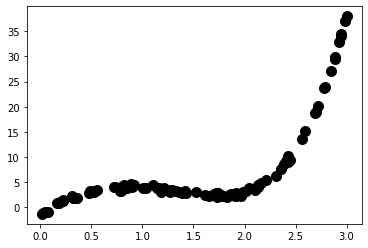

In [2]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.3).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Przykład
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i ocen wyniki na części testowej.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60,) (60,)
(40,) (40,)


In [4]:
X_train=np.vstack(X_train)
X_test=np.vstack(X_test)

In [5]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)

array([ 5.25177394e-01,  1.14597377e+01,  1.56570641e-01, -1.51792992e-01,
        1.00461940e+01,  1.17702183e+00,  1.04812169e+01, -1.37243978e-01,
        1.53215178e+01,  3.00559645e+00,  2.79453430e+00,  1.60730067e+01,
        1.38552984e-01, -1.05936926e-02, -1.59520437e-01,  9.93430824e-01,
        3.77509804e+00,  4.39094089e+00,  1.57447506e+01,  1.88660219e+01,
        2.41586012e-01,  2.70774355e+01,  5.93865301e+00,  1.41682726e+01,
        6.60947062e+00,  6.29588396e+00,  6.60206218e-01,  5.42561104e+00,
       -1.67629161e-01,  2.18062180e+01,  1.17888199e+00,  8.51878656e+00,
        8.01919626e+00,  1.32567414e+01,  1.02528015e+00,  2.73456851e+00,
        7.61445823e+00,  2.44493189e+01,  3.39611436e+00,  6.44481124e+00])

In [6]:
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))

Explained variance score: 0.5701927506771554
Explained variance score: 0.5701927506771554
Median absolute error: 3.6916245728101034
Mean squared error: 17.91553027216998
Mean absolute errors: 3.8181128552368433


# Zadanie
Wylicz powyższe miary na zbiorze testowym dla wszystkich modeli nauczonych na trainie:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

In [7]:
degrees = [1, 2, 3, 4, 5, 25]
for i in degrees:
  model = make_pipeline(PolynomialFeatures(i), lm.LinearRegression())
  model.fit(X_train, y_train)
  print("degree", i)
  print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
  print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
  print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
  print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))

degree 1
Explained variance score: 0.5701927506771554
Median absolute error: 3.6916245728101034
Mean squared error: 17.91553027216998
Mean absolute errors: 3.8181128552368433
degree 2
Explained variance score: 0.5701927506771554
Median absolute error: 3.6916245728101034
Mean squared error: 17.91553027216998
Mean absolute errors: 3.8181128552368433
degree 3
Explained variance score: 0.5701927506771554
Median absolute error: 3.6916245728101034
Mean squared error: 17.91553027216998
Mean absolute errors: 3.8181128552368433
degree 4
Explained variance score: 0.5701927506771554
Median absolute error: 3.6916245728101034
Mean squared error: 17.91553027216998
Mean absolute errors: 3.8181128552368433
degree 5
Explained variance score: 0.5701927506771554
Median absolute error: 3.6916245728101034
Mean squared error: 17.91553027216998
Mean absolute errors: 3.8181128552368433
degree 25
Explained variance score: 0.5701927506771554
Median absolute error: 3.6916245728101034
Mean squared error: 17.91553